In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
df=pd.read_csv('../data/movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'cast', 'tagline', 'overview'], inplace=True)
df.dropna(how='any', subset=['genres', 'director'], inplace=True)
df['production_companies']=df['production_companies'].fillna(0)
df['keywords']=df['keywords'].fillna(0)

In [11]:
df.insert(3, 'profit', df.revenue-df.budget)

C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\130729243.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.barplot(x='original_title', y='revenue', data=df1, palette=colors, label='Revenue')


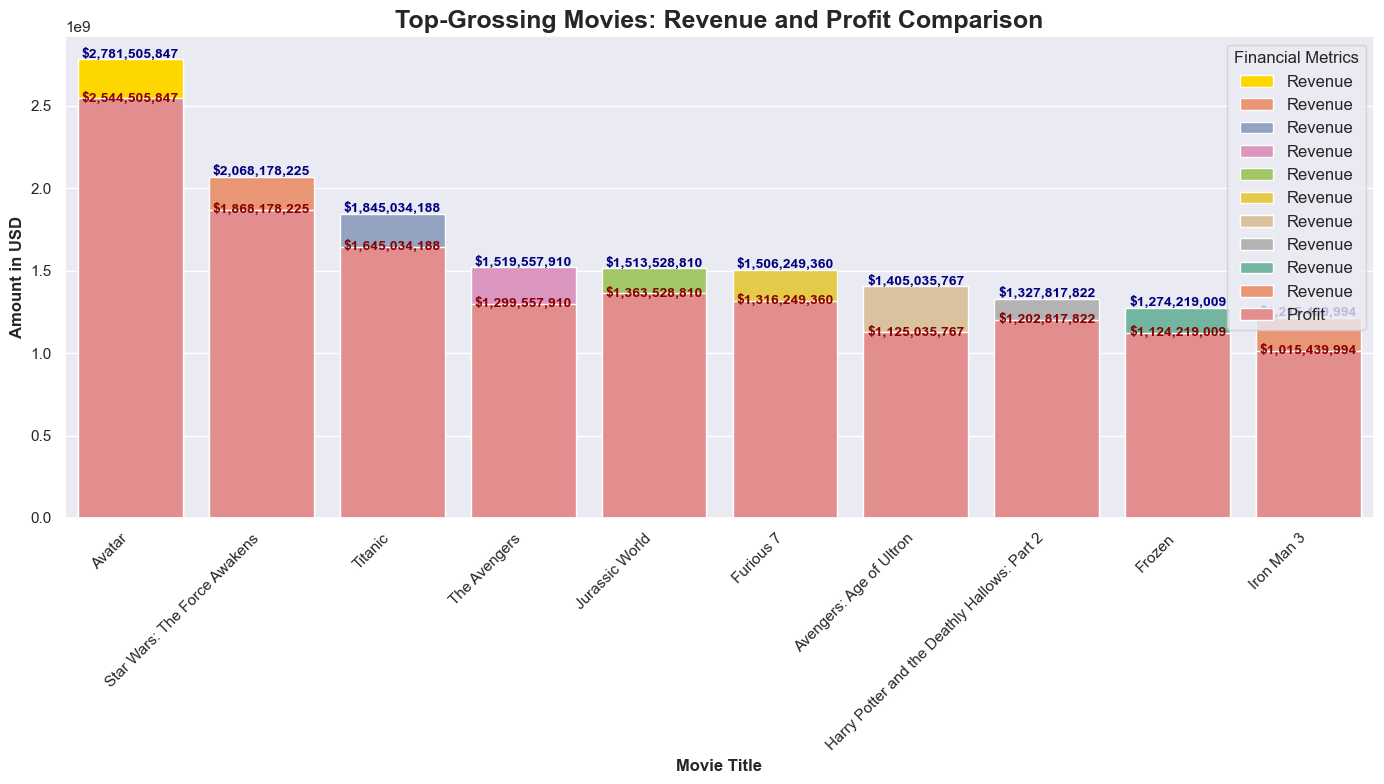

In [15]:
# Sort the DataFrame by revenue
df1 = df.nlargest(10, 'revenue')
df1 = df1[['original_title','revenue','profit']].sort_values(by='revenue', ascending=False)

# Set a modern theme and a figure size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 8))

# Use a color palette for varied colors
colors = sns.color_palette("Set2", len(df1))

# Create the bar chart for revenue
bar1 = sns.barplot(x='original_title', y='revenue', data=df1, palette=colors, label='Revenue')

# Overlay the profit bars with a different color
bar2 = sns.barplot(x='original_title', y='profit', data=df1, color='lightcoral', label='Profit')

# Annotate the bars with exact values for revenue and profit
for i in range(len(df1)):
    bar1.text(i, df1['revenue'].values[i] + 10000000, f'${df1["revenue"].values[i]:,}', ha='center', color='navy', fontsize=10, weight='bold')
    bar2.text(i, df1['profit'].values[i] - 20000000, f'${df1["profit"].values[i]:,}', ha='center', color='darkred', fontsize=10, weight='bold')

# Highlight the top-grossing movie by coloring its bar differently
bar1.patches[0].set_facecolor('gold')  # First bar (top-grossing movie) is set to gold

# Set chart labels and title
plt.title('Top-Grossing Movies: Revenue and Profit Comparison', fontsize=18, weight='bold')
plt.xlabel('Movie Title', fontsize=12, weight='bold')
plt.ylabel('Amount in USD', fontsize=12, weight='bold')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend for clarity
plt.legend(title="Financial Metrics", fontsize=12)

# Adjust the layout for a clean look
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Top-Grossing_Movies_Revenue_and_Profit_Comparison.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

In [16]:
df1=df[['genres', 'revenue']]
split = ['genres']
for i in split:
    df1[i]=df1[i].apply(lambda x: x.split("|"))

df1=df1.explode('genres')

# Group by genres and sum the revenues, then sort by revenue
df1 = df1.groupby('genres')['revenue'].sum().sort_values(ascending=False).reset_index()

print(df1)

             genres       revenue
0            Action  173543608094
1         Adventure  166425793633
2            Comedy  142326036180
3             Drama  139135504255
4          Thriller  121305476800
5            Family   89165240116
6           Fantasy   88223309887
7   Science Fiction   86203712824
8           Romance   61093656624
9             Crime   57368134868
10        Animation   52603987494
11          Mystery   32576228996
12           Horror   27538937718
13              War   12853399491
14            Music   11657281626
15          History   10691938934
16          Western    4713837032
17      Documentary    1061375637
18          Foreign     274846449
19         TV Movie      42000000


C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\1316234771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i]=df1[i].apply(lambda x: x.split("|"))


In [17]:
# Function to format revenue values
def format_values(value):
    if value >= 1_000_000_000:
        return f'${value / 1_000_000_000:.1f}B'
    elif value >= 1_000_000:
        return f'${value / 1_000_000:.1f}M'
    else:
        return f'${value / 1_000:.1f}K'

C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\968958072.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='genres', y='revenue', data=df1, palette=colors)


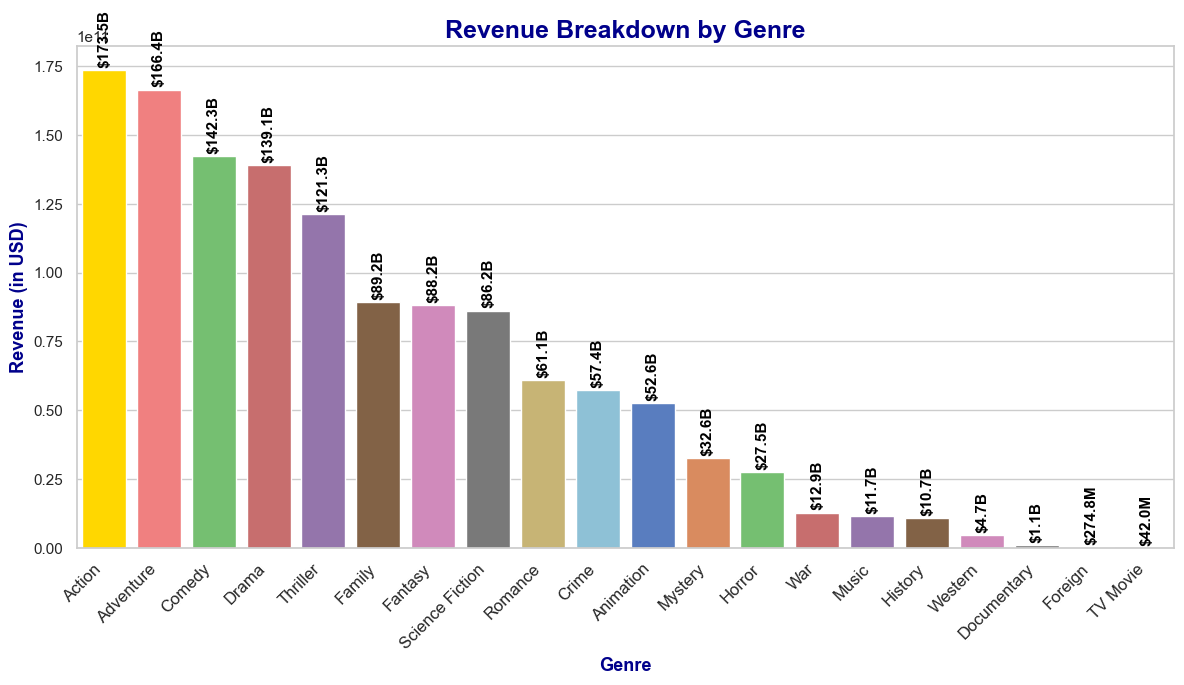

In [18]:
# Set the figure size and apply a modern theme
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Use a color palette for varied and contrasting colors
colors = sns.color_palette("muted", len(df1))

# Create the bar chart for revenue by genre
bar = sns.barplot(x='genres', y='revenue', data=df1, palette=colors)

# Highlight the top 2 most lucrative genres with standout colors
bar.patches[0].set_facecolor('gold')  # Highlight the highest-grossing genre
bar.patches[1].set_facecolor('lightcoral')  # Highlight the second highest

# Annotate the bars with exact revenue values for better comparison
for i in range(len(df1)):
    # bar.text(i, df1['revenue'].values[i] + 20000000, f'${df1["revenue"].values[i]:,}', ha='left', color='black', fontsize=11, weight='bold', rotation =45)
    bar.text(i, df1['revenue'].values[i] + 2000000000, format_values(df1['revenue'].values[i]), 
             ha='center',color='black', fontsize=11, weight='bold', rotation=90)

# Set chart labels and title
plt.title('Revenue Breakdown by Genre', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Genre', fontsize=13, weight='bold', color='darkblue')
plt.ylabel('Revenue (in USD)', fontsize=13, weight='bold', color='darkblue')

# Rotate the x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust layout for a polished look
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Revenue_Breakdown_by_Genre.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

In [19]:
df1=df[['production_companies', 'profit']]

# Split and explode the production companies column
df1['production_companies'] = df1['production_companies'].str.split('|')  
df1 = df1.explode('production_companies')

# Group by production companies and sum the profits
company_profit = df1.groupby('production_companies')['profit'].sum().reset_index()

# Sort the DataFrame by profit in descending order
company_profit = company_profit.sort_values(by='profit', ascending=False)

# Get the top 10 production companies by profit
company_profit = company_profit.head(10).reset_index(drop=True)

# Display the top 10 production companies by profit
company_profit

C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\3316980606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['production_companies'] = df1['production_companies'].str.split('|')


,production_companies,profit
0,Warner Bros.,34703823331
1,Universal Pictures,32575422791
2,Paramount Pictures,27538581413
3,Twentieth Century Fox Film Corporation,27402754987
4,Walt Disney Pictures,22008457637
5,Columbia Pictures,18252662429
6,New Line Cinema,14082723398
7,Amblin Entertainment,12443416032
8,DreamWorks SKG,10079564846
9,DreamWorks Animation,8332549256


C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\485925189.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x='profit', y='production_companies', data=company_profit, palette=colors, orient='h')


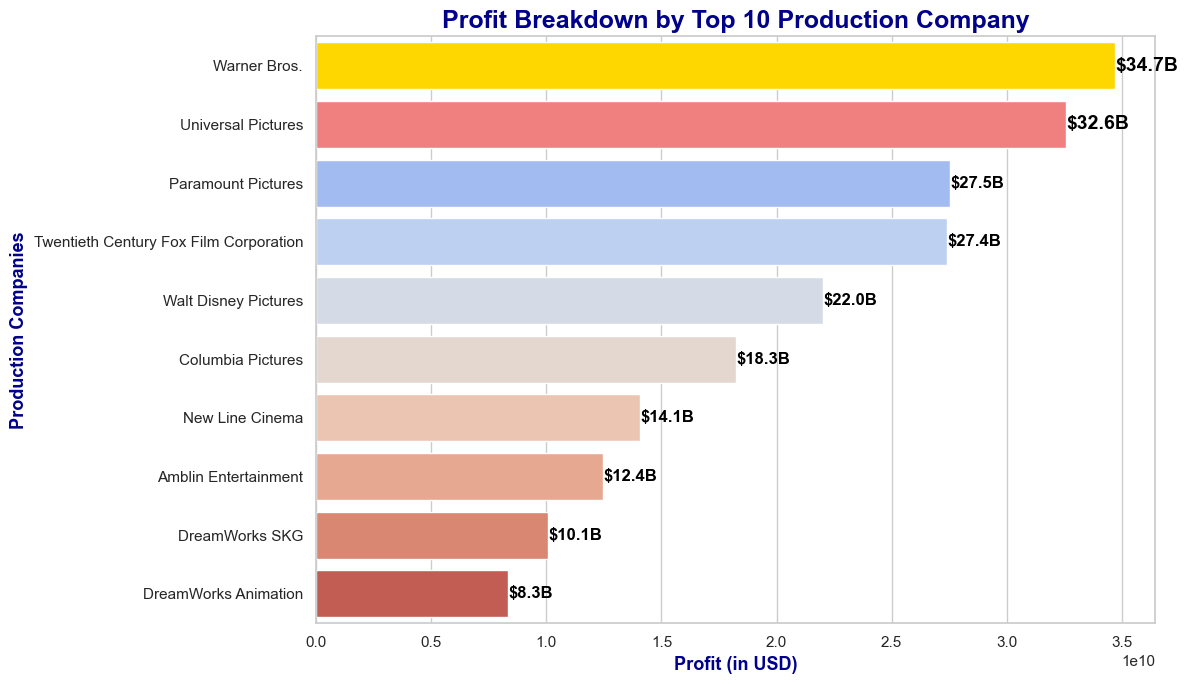

In [20]:
# Set the figure size and apply a modern theme
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

# Use a color palette for varied and contrasting colors
colors = sns.color_palette("coolwarm", len(company_profit))

# Create the horizontal bar chart for profit by production company
bar = sns.barplot(x='profit', y='production_companies', data=company_profit, palette=colors, orient='h')

# Highlight the top performers (top 2) with standout colors or larger fonts
bar.patches[0].set_facecolor('gold')  # Highlight the highest-profit company
bar.patches[1].set_facecolor('lightcoral')  # Highlight the second highest

# Annotate the bars with formatted profit values for better comparison
for i in range(len(company_profit)):
    bar.text(company_profit['profit'].values[i] + 20000000, i, format_values(company_profit['profit'].values[i]), 
             va='center', color='black', fontsize=12 if i > 1 else 14, weight='bold')

# Set chart labels and title
plt.title('Profit Breakdown by Top 10 Production Company', fontsize=18, weight='bold', color='darkblue')
plt.xlabel('Profit (in USD)', fontsize=13, weight='bold', color='darkblue')
plt.ylabel('Production Companies', fontsize=13, weight='bold', color='darkblue')

# Adjust layout for a polished look
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Profit_Breakdown_by_Top_10_Production_Company.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()

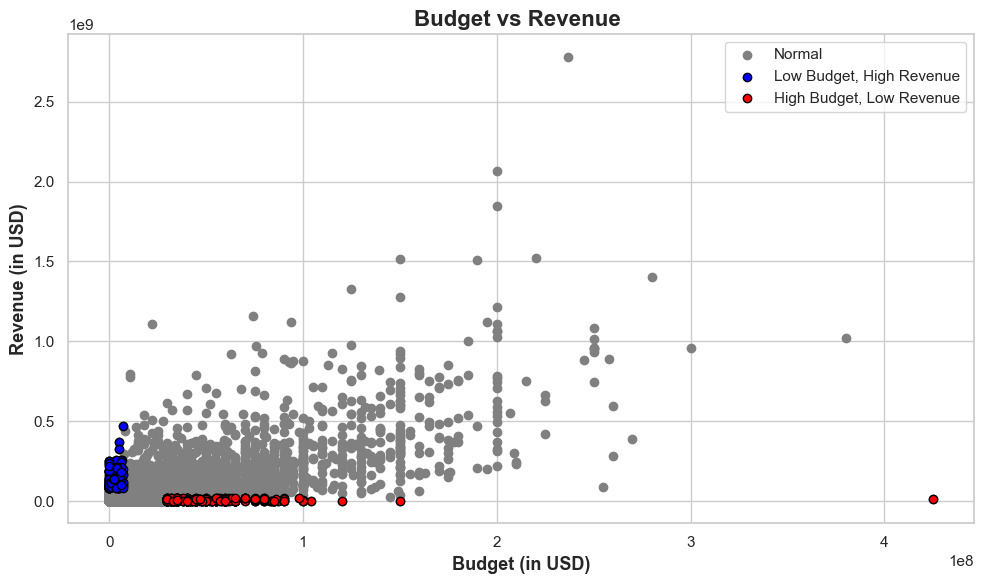

In [21]:
budget_stats=df['budget'].describe()
revenue_stats=df['revenue'].describe()
budget=df['budget']
revenue=df['revenue']



# Determine outliers  
low_budget_high_revenue = (budget < budget_stats['mean'] / 2) & (revenue > revenue_stats['mean'] * 2)  
high_budget_low_revenue = (budget > budget_stats['mean'] * 2) & (revenue < revenue_stats['mean'] / 2)  

# Set the figure size and theme
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Create scatter plot
plt.scatter(df['budget'], df['revenue'], color='gray', label='Normal')

# Highlight low-budget, high-revenue movies in blue
plt.scatter(df[low_budget_high_revenue]['budget'], df[low_budget_high_revenue]['revenue'], color='blue', label='Low Budget, High Revenue', edgecolor='black')

# Highlight high-budget, low-revenue movies in red
plt.scatter(df[high_budget_low_revenue]['budget'], df[high_budget_low_revenue]['revenue'], color='red', label='High Budget, Low Revenue', edgecolor='black')

# Set chart labels and title
plt.title('Budget vs Revenue ', fontsize=16, weight='bold')
plt.xlabel('Budget (in USD)', fontsize=13, weight='bold')
plt.ylabel('Revenue (in USD)', fontsize=13, weight='bold')

# Add a legend
plt.legend()

# Adjust layout for better display
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Budget_vs_Revenue.png', dpi=300, bbox_inches='tight')


# Show plot
plt.show()


C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\403623364.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ROI'] = ((df_filtered['revenue'] - df_filtered['budget']) / df_filtered['budget']) * 100


df_filtered: 
                ROI       revenue
count  3.854000e+03  3.854000e+03
mean   2.970405e+04  1.076840e+08
std    1.644256e+06  1.765408e+08
min   -9.999998e+01  2.000000e+00
25%   -1.243254e+01  1.360003e+07
50%    1.118164e+02  4.480000e+07
75%    3.210444e+02  1.242125e+08
max    1.018618e+08  2.781506e+09


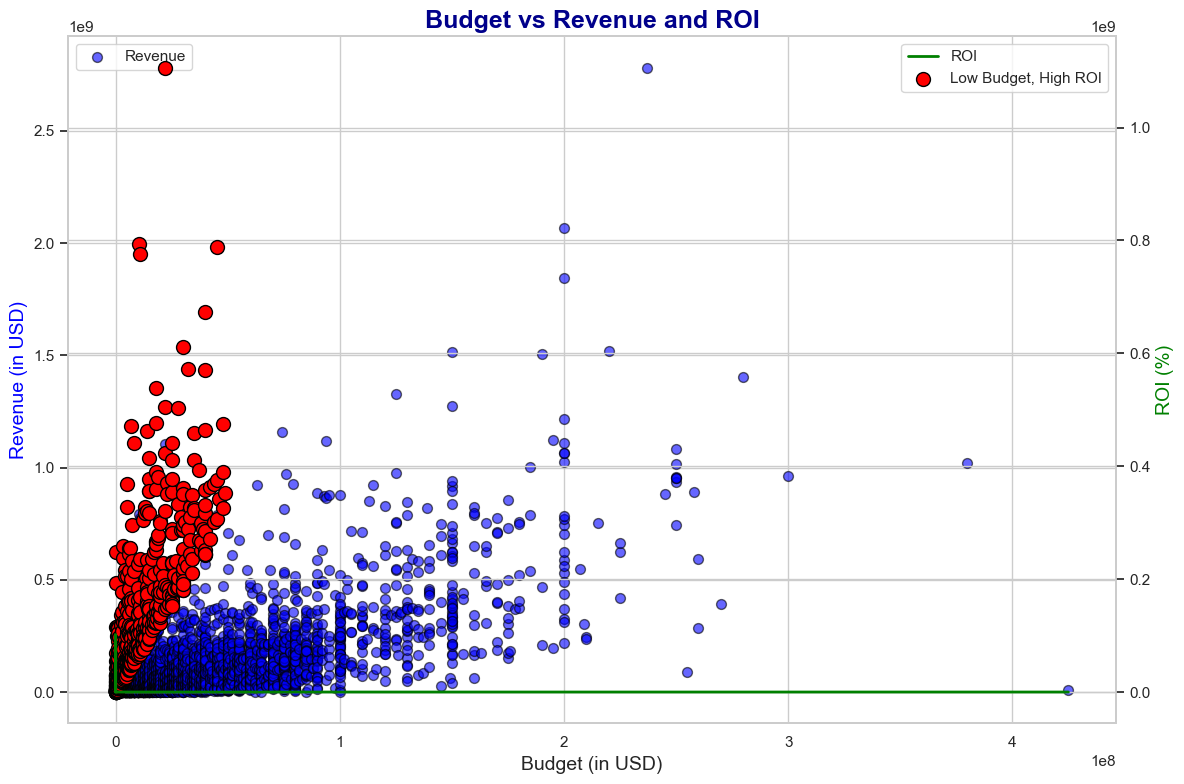

In [22]:
# Remove entries with zero budget or revenue
df['ROI'] = ((df['revenue']-df['budget'])/df['budget'])*100
df_filtered = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# Calculate ROI
df_filtered['ROI'] = ((df_filtered['revenue'] - df_filtered['budget']) / df_filtered['budget']) * 100

print('df_filtered: ')
print(df_filtered[['ROI','revenue']].describe())

# Sort data by budget for clearer plotting
df_filtered = df_filtered.sort_values(by='budget')

# Set the figure size
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Scatter plot: Budget vs. Revenue
plt.scatter(df_filtered['budget'], df_filtered['revenue'], color='blue', label='Revenue', s=50, alpha=0.6, edgecolor='black')

# Line plot for ROI on secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(df_filtered['budget'], df_filtered['ROI'], color='green', label='ROI', lw=2)

# Highlight low-budget, high-ROI movies
low_budget_high_roi = df_filtered[(df_filtered['budget'] < 50000000) & (df_filtered['ROI'] > 500)]
plt.scatter(low_budget_high_roi['budget'], low_budget_high_roi['revenue'], color='red', s=100, label='Low Budget, High ROI', edgecolor='black')

# Labeling and titles
plt.title('Budget vs Revenue and ROI', fontsize=18, weight='bold', color='darkblue')
ax1.set_xlabel('Budget (in USD)', fontsize=14)
ax1.set_ylabel('Revenue (in USD)', fontsize=14, color='blue')
ax2.set_ylabel('ROI (%)', fontsize=14, color='green')

# Adding a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Budget_vs_Revenue_and_ROI.png', dpi=300, bbox_inches='tight')


plt.show()

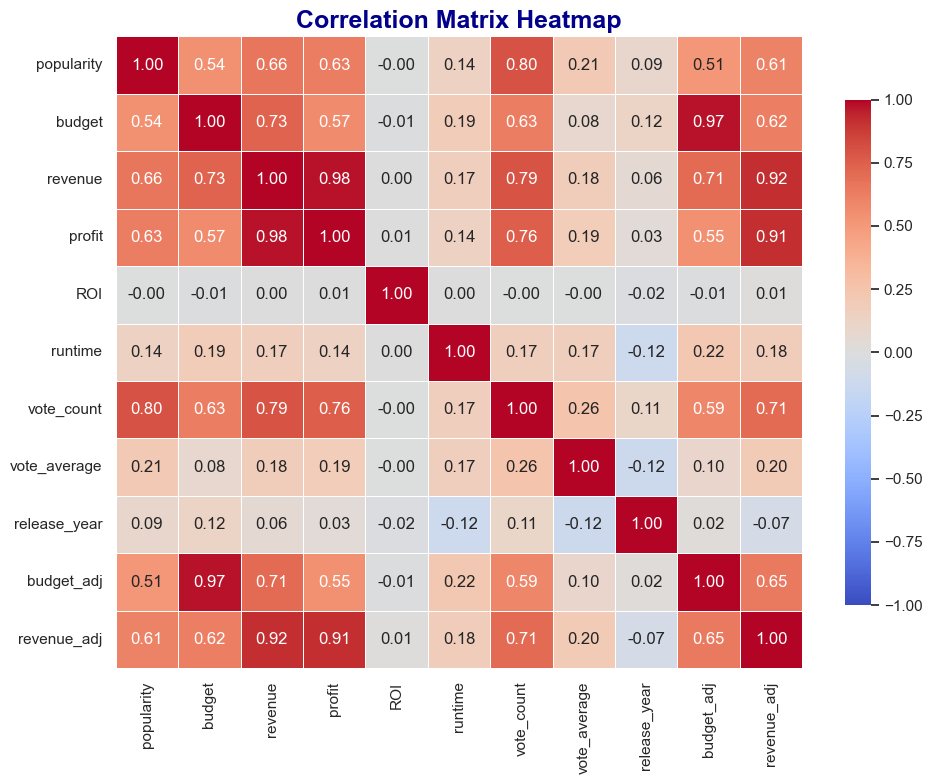

In [23]:
# Calculate the correlation matrix
df1=df[['popularity', 'budget', 'revenue', 'profit', 'ROI', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]
correlation_matrix = df1.corr()

# Set the figure size
plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                       linewidths=0.5, cbar_kws={"shrink": .8},
                       vmin=-1, vmax=1)

# Emphasize strong correlations
heatmap.set_title('Correlation Matrix Heatmap', fontsize=18, weight='bold', color='darkblue')

# Show the plot
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Correlation_Matrix_Heatmap.png', dpi=300, bbox_inches='tight')


plt.show()

C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\671709927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genres'] = df1['genres'].str.split('|')
C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\671709927.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_films', y='genres', data=genre_data, palette='viridis')
C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\671709927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y

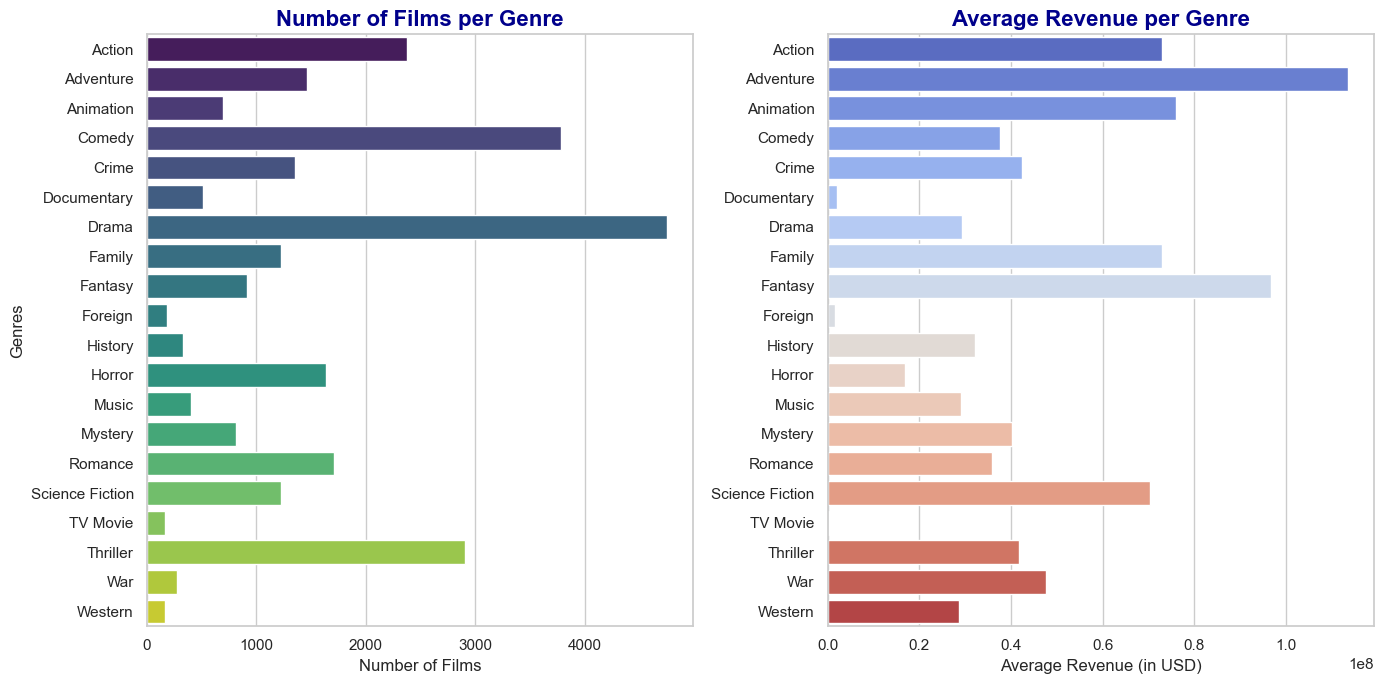

In [24]:
df1 = df[['genres', 'revenue']]

# Split the genres and explode them into multiple rows
df1['genres'] = df1['genres'].str.split('|')
df1 = df1.explode('genres')

# Group by genres to calculate the number of films and average revenue
genre_counts = df1.groupby('genres').size().reset_index(name='num_films')
genre_avg_revenue = df1.groupby('genres')['revenue'].mean().reset_index()

# Merge both DataFrames for easy plotting
genre_data = pd.merge(genre_counts, genre_avg_revenue, on='genres')

# Set the figure size
plt.figure(figsize=(14, 7))

# Create the subplot for the number of films
plt.subplot(1, 2, 1)
sns.barplot(x='num_films', y='genres', data=genre_data, palette='viridis')
plt.title('Number of Films per Genre', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Number of Films', fontsize=12)
plt.ylabel('Genres', fontsize=12)

# Create the subplot for the average revenue per genre
plt.subplot(1, 2, 2)
sns.barplot(x='revenue', y='genres', data=genre_data, palette='coolwarm')
plt.title('Average Revenue per Genre', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Average Revenue (in USD)', fontsize=12)
plt.ylabel('')

# Adjust the layout for clarity
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Films_and_Revenue_By_Genre.png', dpi=300, bbox_inches='tight')

plt.show()

C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\1288036684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['production_companies'] = df1['production_companies'].str.split('|')
C:\Users\PCC\AppData\Local\Temp\ipykernel_15372\1288036684.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x='revenue', y='production_companies', data=top_companies, palette='rocket')


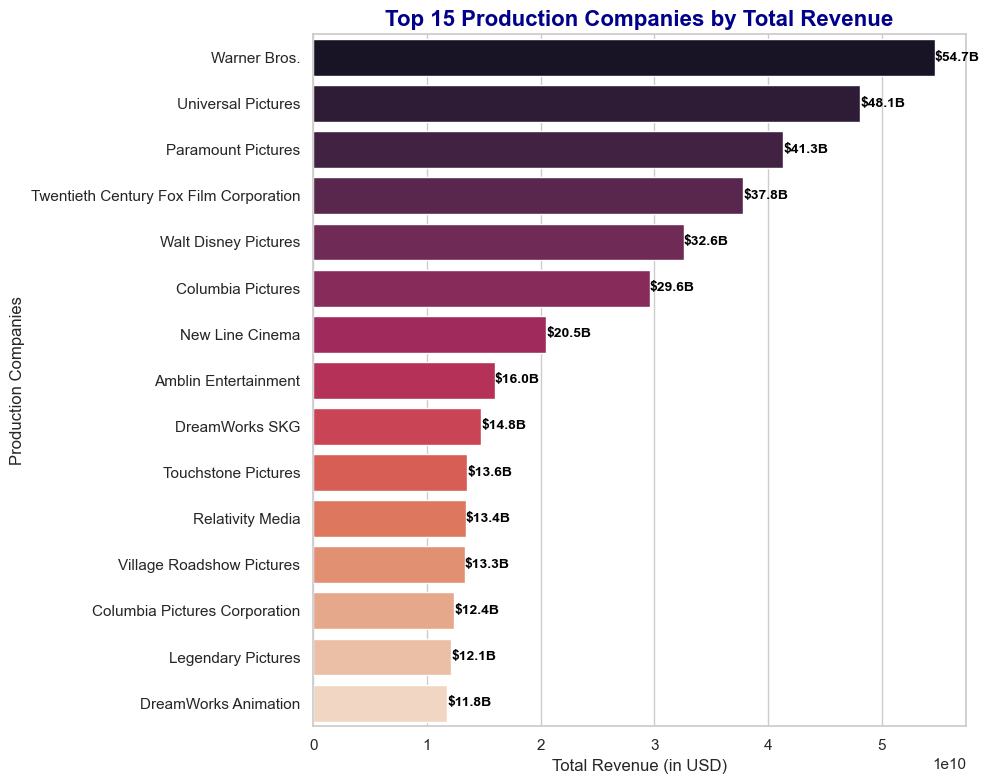

In [25]:
# Assuming df is your DataFrame with 'production_companies' and 'revenue' columns
df1 = df[['production_companies', 'revenue']]

# Split the production companies and explode them into multiple rows
df1['production_companies'] = df1['production_companies'].str.split('|')
df1 = df1.explode('production_companies')

# Group by production companies to calculate the total revenue
company_revenue = df1.groupby('production_companies')['revenue'].sum().reset_index()

# Sort the production companies by total revenue in descending order
company_revenue = company_revenue.sort_values(by='revenue', ascending=False)

# Filter to show only the top 15 companies (or change the number as desired)
top_companies = company_revenue.head(15)

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the bar chart
ax=sns.barplot(x='revenue', y='production_companies', data=top_companies, palette='rocket')


# Add data labels to the bars using the format_values function
for p in ax.patches:
    ax.annotate(format_values(p.get_width()), 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10, color='black', fontweight='bold')


# Title and labels
plt.title('Top 15 Production Companies by Total Revenue', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Total Revenue (in USD)', fontsize=12)
plt.ylabel('Production Companies', fontsize=12)

# Display the plot
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Top_15_Production_Companies_by_Total_Revenue.png', dpi=300, bbox_inches='tight')

plt.show()

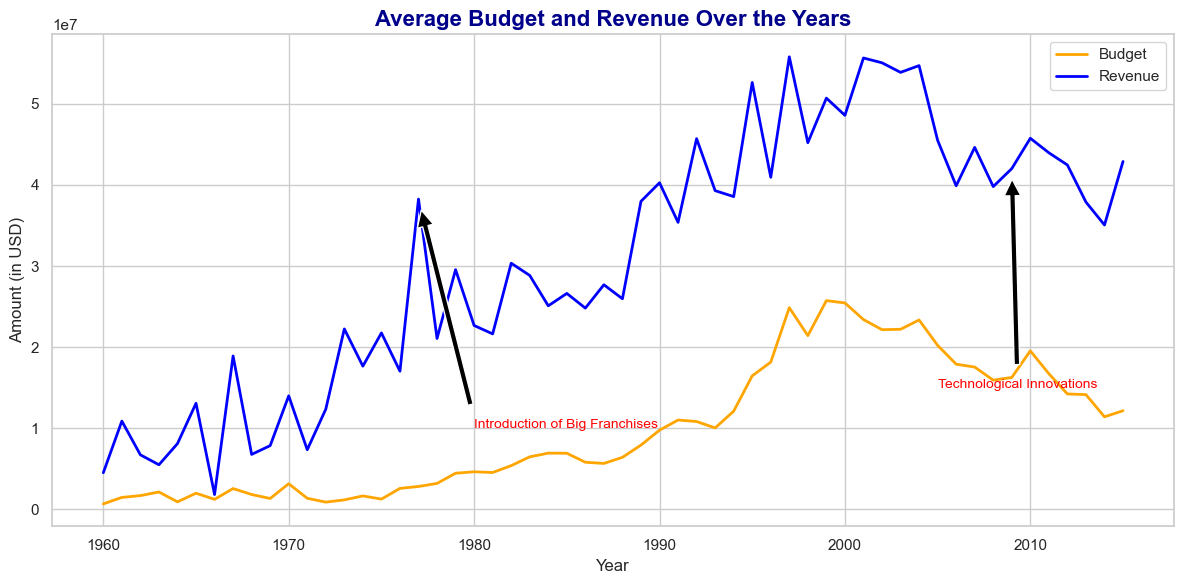

In [29]:
# Group the data by release year and calculate the average budget and revenue
df_yearly = df.groupby('release_year')[['budget', 'revenue']].mean().reset_index()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the budget trend
plt.plot(df_yearly['release_year'], df_yearly['budget'], label='Budget', color='orange', linewidth=2)

# Plot the revenue trend
plt.plot(df_yearly['release_year'], df_yearly['revenue'], label='Revenue', color='blue', linewidth=2)

# Title and labels
plt.title('Average Budget and Revenue Over the Years', fontsize=16, weight='bold', color='darkblue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (in USD)', fontsize=12)

# Adding annotations for key years or events
plt.annotate('Introduction of Big Franchises', xy=(1977, df_yearly[df_yearly['release_year'] == 1977]['revenue'].values[0]),
             xytext=(1980, 1e7), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

plt.annotate('Technological Innovations', xy=(2009, df_yearly[df_yearly['release_year'] == 2009]['revenue'].values[0]),
             xytext=(2005, 1.5e7), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, color='red')

# Display legend
plt.legend()

# Display the plot
plt.tight_layout()

# Save the chart to the desired folder
plt.savefig('Average_Budget_and_Revenue_Over_the_years.png', dpi=300, bbox_inches='tight')

plt.show()